#경로를 수정하고 실행하세요.

In [1]:
# @title Library setting
#from google.colab import drive
#drive.mount('/content/drive/')

### library 설정 ###
import os, glob
import gc

import pandas as pd
import numpy as np
from numpy import fromfile
import csv

from tqdm import trange
from tqdm import tqdm

from statistics import mode, mean
from scipy.interpolate import interp2d
from scipy.signal import butter, filtfilt
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

import datetime as dt
from datetime import datetime, timedelta

import cv2
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import  TensorDataset, DataLoader, random_split, Dataset
from torchvision.transforms import Normalize, ToTensor

### random seed setting ###
import random
random_seed = 1
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

### 경로 설정 ###
#os.chdir("/content/drive/")
#current_path = os.getcwd()


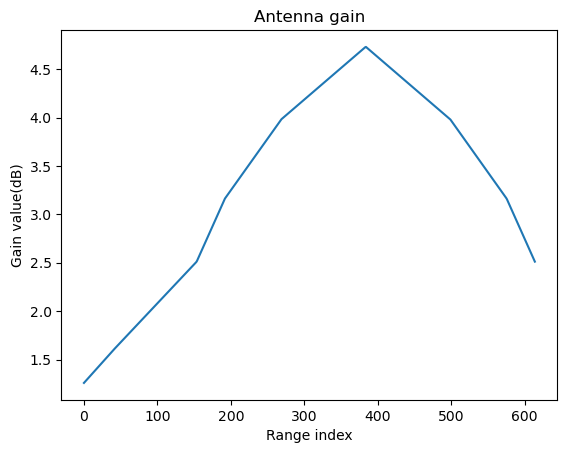

In [2]:
# @title Antenna Gain
antenna_gain = np.array([1.2589254117941673, 1.2674196862089409, 1.2759139606237149, 1.2844082350384887, 1.2929025094532627, 1.3013967838680363, 1.3098910582828103, 1.318385332697584, 1.326879607112358, 1.3353738815271317, 1.3438681559419057, 1.3523624303566795, 1.3608567047714535, 1.369350979186227, 1.377845253601001, 1.3863395280157749, 1.3948338024305489, 1.4033280768453225, 1.4118223512600965, 1.4203166256748703, 1.4288109000896443, 1.4373051745044179, 1.4457994489191919, 1.4542937233339654, 1.4627879977487397, 1.4712822721635133, 1.4797765465782873, 1.488270820993061, 1.496765095407835, 1.5052593698226087, 1.5137536442373827, 1.5222479186521563, 1.5307421930669305, 1.539236467481704, 1.547730741896478, 1.5562250163112519, 1.564719290726026, 1.5732135651407995, 1.5817078395555735, 1.58992572904661, 1.5979777875834047, 1.6060298461201992,
                1.6140819046569939, 1.622133963193788, 1.6301860217305828, 1.638238080267377, 1.6462901388041717, 1.654342197340966, 1.662394255877761, 1.6704463144145552, 1.6784983729513498, 1.686550431488144, 1.6946024900249388, 1.702654548561733, 1.7107066070985277, 1.7187586656353222, 1.726810724172117, 1.7348627827089111, 1.7429148412457054, 1.7509668997825, 1.7590189583192948, 1.767071016856089, 1.7751230753928833, 1.7831751339296782, 1.7912271924664729, 1.7992792510032671, 1.8073313095400614, 1.815383368076856, 1.8234354266136508, 1.831487485150445, 1.8395395436872395, 1.8475916022240342, 1.8556436607608289, 1.8636957192976231, 1.8717477778344174, 1.879799836371212, 1.8878518949080068, 1.895903953444801, 1.9039560119815953, 1.9120080705183902, 1.9200601290551849, 1.928112187591979, 1.9361642461287734, 1.944216304665568,
                1.9522683632023625, 1.9603204217391572, 1.9683724802759515, 1.9764245388127462, 1.9844765973495404, 1.992528655886335, 2.0005807144231293, 2.008632772959924, 2.0166848314967183, 2.024736890033513, 2.0327889485703072, 2.040841007107102, 2.048893065643896, 2.0569451241806913, 2.0649971827174856, 2.0730492412542803, 2.0811012997910745, 2.089153358327869, 2.0972054168646634, 2.105257475401458, 2.1133095339382524, 2.121361592475047, 2.1294136510118413, 2.137465709548636, 2.1455177680854303, 2.153569826622225, 2.161621885159019, 2.1696739436958143, 2.1777260022326086, 2.185778060769403, 2.1938301193061975, 2.2018821778429922, 2.2099342363797865, 2.2179862949165807, 2.2260383534533754, 2.23409041199017, 2.2421424705269644, 2.2501945290637586, 2.2582465876005533, 2.266298646137348, 2.2743507046741422, 2.2824027632109365,
                2.2904548217477316, 2.298506880284526, 2.3065589388213206, 2.314610997358115, 2.3226630558949095, 2.330715114431704, 2.3387671729684985, 2.3468192315052927, 2.3548712900420874, 2.362923348578882, 2.3709754071156763, 2.3790274656524706, 2.3870795241892653, 2.39513158272606, 2.4031836412628547, 2.411235699799649, 2.4192877583364436, 2.427339816873238, 2.4353918754100325, 2.443443933946827, 2.4514959924836215, 2.459548051020416, 2.4676001095572104, 2.4756521680940047, 2.4837042266307994, 2.491756285167594, 2.4998083437043883, 2.507860402241183, 2.5203605843259815, 2.5373088899587843, 2.5542571955915867, 2.5712055012243895, 2.588153806857192, 2.6051021124899947, 2.622050418122797, 2.6389987237555994, 2.655947029388402, 2.6728953350212046, 2.6898436406540074, 2.7067919462868097, 2.7237402519196126, 2.740688557552415,
                2.7576368631852177, 2.77458516881802, 2.791533474450823, 2.8084817800836253, 2.825430085716428, 2.8423783913492304, 2.8593266969820332, 2.8762750026148356, 2.8932233082476384, 2.9101716138804408, 2.9271199195132436, 2.9440682251460464, 2.9610165307788487, 2.977964836411651, 2.994913142044454, 3.0118614476772567, 3.028809753310059, 3.045758058942862, 3.0627063645756643, 3.079654670208467, 3.0966029758412694, 3.1135512814740722, 3.1304995871068746, 3.1474478927396774, 3.163611200958879, 3.1742795272828737, 3.1849478536068685, 3.195616179930863, 3.2062845062548577, 3.2169528325788526, 3.227621158902847, 3.238289485226842, 3.2489578115508366, 3.259626137874831, 3.270294464198826, 3.2809627905228207, 3.291631116846815, 3.30229944317081, 3.3129677694948048, 3.3236360958187996, 3.334304422142794, 3.344972748466789,
                3.3556410747907837, 3.366309401114778, 3.376977727438773, 3.3876460537627677, 3.398314380086762, 3.408982706410757, 3.419651032734752, 3.430319359058746, 3.440987685382741, 3.451656011706736, 3.4623243380307303, 3.472992664354725, 3.48366099067872, 3.4943293170027143, 3.5049976433267087, 3.5156659696507035, 3.5263342959746984, 3.537002622298693, 3.5476709486226876, 3.5583392749466825, 3.5690076012706773, 3.5796759275946717, 3.5903442539186665, 3.6010125802426614, 3.611680906566656, 3.6223492328906506, 3.6330175592146454, 3.6436858855386403, 3.6543542118626346, 3.6650225381866295, 3.6756908645106243, 3.6863591908346187, 3.6970275171586136, 3.7076958434826084, 3.718364169806603, 3.7290324961305976, 3.7397008224545925, 3.7503691487785873, 3.7610374751025817, 3.7717058014265765, 3.782374127750571, 3.793042454074566,
                3.8037107803985606, 3.8143791067225554, 3.82504743304655, 3.8357157593705447, 3.846384085694539, 3.857052412018534, 3.8677207383425287, 3.878389064666523, 3.889057390990518, 3.899725717314513, 3.9103940436385076, 3.921062369962502, 3.931730696286497, 3.9423990226104912, 3.9530673489344865, 3.963735675258481, 3.9744040015824758, 3.9835161383821376, 3.9900346259745794, 3.9965531135670207, 4.003071601159463, 4.009590088751904, 4.016108576344346, 4.022627063936787, 4.029145551529229, 4.03566403912167, 4.042182526714112, 4.048701014306554, 4.055219501898995, 4.061737989491436, 4.068256477083878, 4.07477496467632, 4.081293452268761, 4.0878119398612025, 4.094330427453644, 4.100848915046086, 4.107367402638527, 4.113885890230969, 4.1204043778234105, 4.126922865415851, 4.133441353008293, 4.139959840600735, 4.146478328193177,
                4.152996815785618, 4.159515303378059, 4.166033790970501, 4.172552278562943, 4.179070766155384, 4.185589253747826, 4.192107741340267, 4.198626228932709, 4.20514471652515, 4.211663204117592, 4.218181691710034, 4.224700179302475, 4.231218666894916, 4.237737154487358, 4.2442556420798, 4.250774129672242, 4.2572926172646826, 4.263811104857124, 4.270329592449566, 4.276848080042008, 4.283366567634449, 4.289885055226891, 4.296403542819332, 4.302922030411774, 4.309440518004215, 4.315959005596657, 4.322477493189099, 4.3289959807815395, 4.335514468373981, 4.342032955966423, 4.348551443558865, 4.355069931151306, 4.3615884187437475, 4.368106906336189, 4.374625393928631, 4.381143881521072, 4.387662369113514, 4.3941808567059555, 4.400699344298397, 4.407217831890838, 4.41373631948328, 4.420254807075722, 4.4267732946681635,
                4.433291782260604, 4.439810269853046, 4.446328757445488, 4.45284724503793, 4.459365732630371, 4.465884220222812, 4.472402707815254, 4.478921195407695, 4.485439683000137, 4.491958170592579, 4.4984766581850195, 4.504995145777462, 4.511513633369903, 4.518032120962345, 4.524550608554787, 4.5310690961472275, 4.537587583739669, 4.544106071332111, 4.550624558924552, 4.557143046516994, 4.5636615341094355, 4.570180021701877, 4.576698509294319, 4.58321699688676, 4.589735484479202, 4.5962539720716435, 4.602772459664084, 4.609290947256526, 4.615809434848968, 4.62232792244141, 4.628846410033851, 4.6353648976262924, 4.641883385218734, 4.648401872811176, 4.654920360403617, 4.661438847996059, 4.6679573355885005, 4.674475823180942, 4.680994310773383, 4.687512798365825, 4.694031285958267, 4.7005497735507085, 4.707068261143149,
                4.713586748735591, 4.720105236328033, 4.726623723920475, 4.729882967716695, 4.723364480124253, 4.716845992531812, 4.710327504939371, 4.703809017346929, 4.697290529754487, 4.690772042162045, 4.6842535545696045, 4.677735066977163, 4.671216579384721, 4.664698091792279, 4.658179604199838, 4.6516611166073965, 4.645142629014955, 4.638624141422513, 4.632105653830072, 4.62558716623763, 4.619068678645188, 4.612550191052747, 4.606031703460306, 4.599513215867864, 4.592994728275422, 4.58647624068298, 4.5799577530905395, 4.573439265498098, 4.566920777905656, 4.560402290313214, 4.553883802720773, 4.5473653151283315, 4.54084682753589, 4.534328339943448, 4.527809852351007, 4.521291364758565, 4.5147728771661235, 4.508254389573683, 4.501735901981241, 4.495217414388799, 4.488698926796358, 4.482180439203916, 4.475661951611475,
                4.469143464019033, 4.462624976426592, 4.45610648883415, 4.449588001241708, 4.443069513649267, 4.436551026056826, 4.430032538464384, 4.423514050871942, 4.4169955632795, 4.4104770756870595, 4.403958588094618, 4.397440100502176, 4.390921612909734, 4.384403125317293, 4.3778846377248515, 4.37136615013241, 4.364847662539968, 4.358329174947527, 4.351810687355085, 4.3452921997626435, 4.338773712170202, 4.332255224577761, 4.325736736985319, 4.319218249392877, 4.312699761800436, 4.306181274207995, 4.299662786615553, 4.293144299023111, 4.28662581143067, 4.280107323838228, 4.273588836245787, 4.267070348653345, 4.260551861060904, 4.254033373468462, 4.24751488587602, 4.2409963982835786, 4.234477910691138, 4.227959423098696, 4.221440935506254, 4.214922447913812, 4.208403960321371, 4.20188547272893, 4.195366985136488,
                4.188848497544046, 4.182330009951605, 4.175811522359163, 4.169293034766722, 4.16277454717428, 4.156256059581839, 4.149737571989397, 4.143219084396955, 4.1367005968045145, 4.130182109212073, 4.123663621619631, 4.11714513402719, 4.110626646434747, 4.1041081588423065, 4.097589671249865, 4.091071183657423, 4.084552696064982, 4.07803420847254, 4.0715157208800985, 4.064997233287658, 4.058478745695216, 4.051960258102774, 4.045441770510332, 4.0389232829178905, 4.03240479532545, 4.025886307733008, 4.019367820140566, 4.012849332548124, 4.006330844955683, 3.9998123573632416, 3.9932938697708, 3.986775382178358, 3.979738164744473, 3.969069838420478, 3.9584015120964833, 3.947733185772488, 3.9370648594484945, 3.926396533124499, 3.9157282068005044, 3.9050598804765095, 3.8943915541525156, 3.8837232278285208, 3.8730549015045255,
                3.8623865751805306, 3.8517182488565367, 3.841049922532542, 3.8303815962085466, 3.819713269884553, 3.809044943560558, 3.798376617236563, 3.787708290912568, 3.777039964588574, 3.7663716382645793, 3.755703311940584, 3.745034985616589, 3.7343666592925953, 3.7236983329686004, 3.7130300066446056, 3.7023616803206103, 3.691693353996617, 3.6810250276726215, 3.6703567013486267, 3.659688375024632, 3.649020048700638, 3.638351722376643, 3.627683396052648, 3.617015069728653, 3.606346743404659, 3.595678417080664, 3.585010090756669, 3.574341764432674, 3.56367343810868, 3.5530051117846853, 3.5423367854606904, 3.531668459136695, 3.521000132812701, 3.5103318064887064, 3.4996634801647115, 3.4889951538407162, 3.4783268275167227, 3.4676585011927274, 3.4569901748687326, 3.4463218485447378, 3.435653522220744, 3.424985195896749,
                3.4143168695727537, 3.403648543248759, 3.392980216924765, 3.38231189060077, 3.3716435642767753, 3.36097523795278, 3.3503069116287865, 3.339638585304791, 3.3289702589807963, 3.3183019326568015, 3.3076336063328076, 3.2969652800088127, 3.2862969536848174, 3.2756286273608226, 3.2649603010368287, 3.254291974712834, 3.2436236483888385, 3.2329553220648437, 3.2222869957408498, 3.211618669416855, 3.2009503430928596, 3.190282016768865, 3.179613690444871, 3.168945364120876, 3.155922045556078, 3.138973739923277, 3.1220254342904736, 3.1050771286576704, 3.0881288230248676, 3.071180517392066, 3.0542322117592633, 3.03728390612646, 3.0203356004936572, 3.0033872948608558, 2.986438989228053, 2.9694906835952497, 2.952542377962447, 2.9355940723296454, 2.9186457666968426, 2.9016974610640394, 2.884749155431236, 2.867800849798435,
                2.8508525441656323, 2.833904238532829, 2.8169559329000258, 2.8000076272672247, 2.7830593216344215, 2.7661110160016187, 2.7491627103688154, 2.7322144047360144, 2.715266099103211, 2.6983177934704083, 2.681369487837605, 2.664421182204804, 2.647472876572001, 2.6305245709391976, 2.6135762653063948, 2.5966279596735937, 2.5796796540407905, 2.562731348407987, 2.5457830427751844, 2.5288347371423834, 2.51188643150958])

plt.plot(antenna_gain)
plt.title("Antenna gain")
plt.xlabel("Range index")
plt.ylabel("Gain value(dB)")
plt.show()

In [3]:
# @title TIME-FRAME / Clutter reduction setting
def frame2time(now_time, count_frame) :
    now_time = datetime.strptime(now_time, '%H%M%S')
    new_hour = count_frame // (17*60*60)
    count_frame %= (17*60*60)
    new_min = count_frame // (17*60)
    count_frame %= (17*60)
    new_sec = count_frame // 17
    count_frame %= 17
    calc_time = now_time + timedelta(seconds=new_sec) + timedelta(minutes=new_min) + timedelta(hours=new_hour)
    calc_time = calc_time.strftime('%H:%M:%S') + "."+str(count_frame*100//17)
    return calc_time

def time2frame(now_time, want_time) :
    now_time = datetime.strptime(now_time, '%H%M%S')
    want_time = datetime.strptime(want_time, '%H%M%S')
    time_diff = want_time - now_time
    total_seconds = time_diff.total_seconds()  # 총 초 단위로 변환
    frame_rate = 17  # 초당 프레임 수
    frame_count = int(total_seconds * frame_rate)  # 프레임 수 계산
    return frame_count

def preprocessing(rawData, alpha=0.96) : # Clutter reduction

    rawData = rawData - np.mean(rawData, axis=1).reshape(-1,1) ## DC offset
    nrow, ncol = rawData.shape

    crData = np.zeros_like(rawData, dtype='f4')
    prevEma = np.array([rawData[0]], dtype='f4')
    for i in range(nrow):
        crData[i] = rawData[i]-prevEma[0]
        prevEma[0] = (1-alpha)*rawData[i]+alpha*prevEma[0]
    return crData


In [4]:
# @title Data loader setting
def load_data(search_date, search_start, search_end) :
    # 파일 로드 준비
    current_path = os.getcwd() # 파일이 저장된 경로 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 수정이 필요한 부분
    file_paths = sorted( glob.glob( os.path.join(current_path, '**', '*.dat'), recursive=True))
    dat_path_lists = np.array( sorted( [file_path for file_path in file_paths if f'2023{str(search_date)}' in file_path])) # dat 파일 목록
    dat_time_lists = sorted([ datetime.strptime((time.split('_')[-1][0:6]), '%H%M%S') for time in dat_path_lists]) # dat 파일 녹화 시작시간 목록
    time_start = datetime.strptime(search_start, '%H%M%S')
    time_end = datetime.strptime(search_end, '%H%M%S')

    # 파일 로드 시작
    counter = 1144
    dat_paths = []
    for dat_time, dat_path in zip(dat_time_lists, dat_path_lists) :
        if (dat_time < time_start) and (time_start < dat_time+timedelta(hours=1)) :
            dat_paths.append(dat_path)
        elif (dat_time < time_end) and (time_end < dat_time+timedelta(hours=1)) :
            dat_paths.append(dat_path)
    raw_line = np.concatenate([np.fromfile(dat_path, 'float32') for dat_path in dat_paths], axis=0)
    useRow = len(raw_line)//counter # frame 수가 될 것.
    cutRow = useRow*counter
    raw_array = np.reshape( raw_line[ : cutRow], (useRow, counter) )

    first_time = dat_paths[0].split('_')[-1][0:6] # 첫 번째 파일의 시작시간 string.
    start_frame = time2frame(first_time, search_start)
    end_frame = time2frame(first_time, search_end)

    # raw data / clutter reduction data 생성
    rawData = raw_array[ start_frame : end_frame , 215 : 830 ] # 시작시간~끝시간, 1 ~ 5m
    crData = preprocessing(rawData)

    return rawData, crData

In [216]:
# @title SEARCH

search_date = "0523"
start = '075821' # 시작시간 지정 0522 = 075146 0523 = 075821
end = '165805' # 종료시간 지정 0522 =161002 0523 = 165821

start_time = datetime.strptime(start, "%H%M%S")
end_time = datetime.strptime(end, "%H%M%S")

if search_date == "0522":
    labels = ['082919','084950','090226','091804','091939','092011','092152','092838','093505','093551','100654','100812','101600','102338','103954','105728','111717','113515','115237','115650','120125','120135','122000','122836','131741','132937','133213','133218','133241','134407','153730']
elif search_date == "0523":
    labels = ['082656','090222','092532','100318','102711','104609','104756','104905','110206','111801','113648','121732','121915','131051','132650','133753','135512','141157']
pointer = 0

current_time = start_time
while current_time <= end_time:
    print(current_time.strftime("%H:%M:%S"))

    search_start = current_time.strftime("%H%M%S")
    current_time += timedelta(seconds=8)
    search_end = current_time.strftime("%H%M%S")

    rawData, crData = load_data(search_date, search_start, search_end)
    if pointer < len(labels) and search_end >labels[pointer] >= search_start:
        label = 1
        while pointer < len(labels) and search_end >labels[pointer]:
            pointer+=1
    else:
        label = 0
    np.save('./%s%s_%d.npy' %(search_date,search_start,label), crData)#경로설정







07:58:21
07:58:29
07:58:37
07:58:45
07:58:53
07:59:01
07:59:09
07:59:17
07:59:25
07:59:33
07:59:41
07:59:49
07:59:57
08:00:05
08:00:13
08:00:21
08:00:29
08:00:37
08:00:45
08:00:53
08:01:01
08:01:09
08:01:17
08:01:25
08:01:33
08:01:41
08:01:49
08:01:57
08:02:05
08:02:13
08:02:21
08:02:29
08:02:37
08:02:45
08:02:53
08:03:01
08:03:09
08:03:17
08:03:25
08:03:33
08:03:41
08:03:49
08:03:57
08:04:05
08:04:13
08:04:21
08:04:29
08:04:37
08:04:45
08:04:53
08:05:01
08:05:09
08:05:17
08:05:25
08:05:33
08:05:41
08:05:49
08:05:57
08:06:05
08:06:13
08:06:21
08:06:29
08:06:37
08:06:45
08:06:53
08:07:01
08:07:09
08:07:17
08:07:25
08:07:33
08:07:41
08:07:49
08:07:57
08:08:05
08:08:13
08:08:21
08:08:29
08:08:37
08:08:45
08:08:53
08:09:01
08:09:09
08:09:17
08:09:25
08:09:33
08:09:41
08:09:49
08:09:57
08:10:05
08:10:13
08:10:21
08:10:29
08:10:37
08:10:45
08:10:53
08:11:01
08:11:09
08:11:17
08:11:25
08:11:33
08:11:41
08:11:49
08:11:57
08:12:05
08:12:13
08:12:21
08:12:29
08:12:37
08:12:45
08:12:53
08:13:01
0

09:59:49
09:59:57
10:00:05
10:00:13
10:00:21
10:00:29
10:00:37
10:00:45
10:00:53
10:01:01
10:01:09
10:01:17
10:01:25
10:01:33
10:01:41
10:01:49
10:01:57
10:02:05
10:02:13
10:02:21
10:02:29
10:02:37
10:02:45
10:02:53
10:03:01
10:03:09
10:03:17
10:03:25
10:03:33
10:03:41
10:03:49
10:03:57
10:04:05
10:04:13
10:04:21
10:04:29
10:04:37
10:04:45
10:04:53
10:05:01
10:05:09
10:05:17
10:05:25
10:05:33
10:05:41
10:05:49
10:05:57
10:06:05
10:06:13
10:06:21
10:06:29
10:06:37
10:06:45
10:06:53
10:07:01
10:07:09
10:07:17
10:07:25
10:07:33
10:07:41
10:07:49
10:07:57
10:08:05
10:08:13
10:08:21
10:08:29
10:08:37
10:08:45
10:08:53
10:09:01
10:09:09
10:09:17
10:09:25
10:09:33
10:09:41
10:09:49
10:09:57
10:10:05
10:10:13
10:10:21
10:10:29
10:10:37
10:10:45
10:10:53
10:11:01
10:11:09
10:11:17
10:11:25
10:11:33
10:11:41
10:11:49
10:11:57
10:12:05
10:12:13
10:12:21
10:12:29
10:12:37
10:12:45
10:12:53
10:13:01
10:13:09
10:13:17
10:13:25
10:13:33
10:13:41
10:13:49
10:13:57
10:14:05
10:14:13
10:14:21
10:14:29
1

12:01:17
12:01:25
12:01:33
12:01:41
12:01:49
12:01:57
12:02:05
12:02:13
12:02:21
12:02:29
12:02:37
12:02:45
12:02:53
12:03:01
12:03:09
12:03:17
12:03:25
12:03:33
12:03:41
12:03:49
12:03:57
12:04:05
12:04:13
12:04:21
12:04:29
12:04:37
12:04:45
12:04:53
12:05:01
12:05:09
12:05:17
12:05:25
12:05:33
12:05:41
12:05:49
12:05:57
12:06:05
12:06:13
12:06:21
12:06:29
12:06:37
12:06:45
12:06:53
12:07:01
12:07:09
12:07:17
12:07:25
12:07:33
12:07:41
12:07:49
12:07:57
12:08:05
12:08:13
12:08:21
12:08:29
12:08:37
12:08:45
12:08:53
12:09:01
12:09:09
12:09:17
12:09:25
12:09:33
12:09:41
12:09:49
12:09:57
12:10:05
12:10:13
12:10:21
12:10:29
12:10:37
12:10:45
12:10:53
12:11:01
12:11:09
12:11:17
12:11:25
12:11:33
12:11:41
12:11:49
12:11:57
12:12:05
12:12:13
12:12:21
12:12:29
12:12:37
12:12:45
12:12:53
12:13:01
12:13:09
12:13:17
12:13:25
12:13:33
12:13:41
12:13:49
12:13:57
12:14:05
12:14:13
12:14:21
12:14:29
12:14:37
12:14:45
12:14:53
12:15:01
12:15:09
12:15:17
12:15:25
12:15:33
12:15:41
12:15:49
12:15:57
1

14:02:45
14:02:53
14:03:01
14:03:09
14:03:17
14:03:25
14:03:33
14:03:41
14:03:49
14:03:57
14:04:05
14:04:13
14:04:21
14:04:29
14:04:37
14:04:45
14:04:53
14:05:01
14:05:09
14:05:17
14:05:25
14:05:33
14:05:41
14:05:49
14:05:57
14:06:05
14:06:13
14:06:21
14:06:29
14:06:37
14:06:45
14:06:53
14:07:01
14:07:09
14:07:17
14:07:25
14:07:33
14:07:41
14:07:49
14:07:57
14:08:05
14:08:13
14:08:21
14:08:29
14:08:37
14:08:45
14:08:53
14:09:01
14:09:09
14:09:17
14:09:25
14:09:33
14:09:41
14:09:49
14:09:57
14:10:05
14:10:13
14:10:21
14:10:29
14:10:37
14:10:45
14:10:53
14:11:01
14:11:09
14:11:17
14:11:25
14:11:33
14:11:41
14:11:49
14:11:57
14:12:05
14:12:13
14:12:21
14:12:29
14:12:37
14:12:45
14:12:53
14:13:01
14:13:09
14:13:17
14:13:25
14:13:33
14:13:41
14:13:49
14:13:57
14:14:05
14:14:13
14:14:21
14:14:29
14:14:37
14:14:45
14:14:53
14:15:01
14:15:09
14:15:17
14:15:25
14:15:33
14:15:41
14:15:49
14:15:57
14:16:05
14:16:13
14:16:21
14:16:29
14:16:37
14:16:45
14:16:53
14:17:01
14:17:09
14:17:17
14:17:25
1

16:04:13
16:04:21
16:04:29
16:04:37
16:04:45
16:04:53
16:05:01
16:05:09
16:05:17
16:05:25
16:05:33
16:05:41
16:05:49
16:05:57
16:06:05
16:06:13
16:06:21
16:06:29
16:06:37
16:06:45
16:06:53
16:07:01
16:07:09
16:07:17
16:07:25
16:07:33
16:07:41
16:07:49
16:07:57
16:08:05
16:08:13
16:08:21
16:08:29
16:08:37
16:08:45
16:08:53
16:09:01
16:09:09
16:09:17
16:09:25
16:09:33
16:09:41
16:09:49
16:09:57
16:10:05
16:10:13
16:10:21
16:10:29
16:10:37
16:10:45
16:10:53
16:11:01
16:11:09
16:11:17
16:11:25
16:11:33
16:11:41
16:11:49
16:11:57
16:12:05
16:12:13
16:12:21
16:12:29
16:12:37
16:12:45
16:12:53
16:13:01
16:13:09
16:13:17
16:13:25
16:13:33
16:13:41
16:13:49
16:13:57
16:14:05
16:14:13
16:14:21
16:14:29
16:14:37
16:14:45
16:14:53
16:15:01
16:15:09
16:15:17
16:15:25
16:15:33
16:15:41
16:15:49
16:15:57
16:16:05
16:16:13
16:16:21
16:16:29
16:16:37
16:16:45
16:16:53
16:17:01
16:17:09
16:17:17
16:17:25
16:17:33
16:17:41
16:17:49
16:17:57
16:18:05
16:18:13
16:18:21
16:18:29
16:18:37
16:18:45
16:18:53
1

NameError: name 'rawData' is not defined

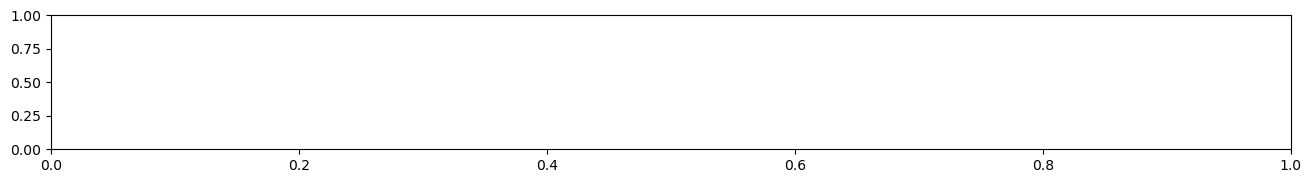

In [3]:
# 시각화
plt.figure(figsize=(16,8))
plt.subplot(4,1,1)
plt.plot(rawData[10])
plt.title("Raw Signal")
plt.subplot(4,1,2)
plt.plot(crData[10])
plt.title("after Clutter reduction") # 10번째 frame에서의 raw signal / clutter reduction signal
plt.subplot(4,1,3)
plt.pcolormesh(abs(rawData.T))
plt.title("Raw Signal Map")
plt.subplot(4,1,4)
plt.pcolormesh(abs(crData.T))
plt.title("Clutter reduction Signal Map") # 탐색 구간동안의 raw signal map / clutter reduction signal map
plt.tight_layout()
plt.show()


In [5]:
current_path = os.getcwd()
npy_paths = sorted( glob.glob( os.path.join(current_path, '**', '*.npy'), recursive=True))
npy_path_lists = sorted( [npy_path for npy_path in npy_paths ]) #getting npy files

In [59]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 34 * 153, 64)  
        self.fc2 = nn.Linear(64, 64)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


In [60]:
# 모델 인스턴스 생성
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [56]:
class dset(Dataset):
    def __init__(self, file_path):
        self.file_path = sorted( glob.glob( os.path.join(file_path, '**', '*.npy'), recursive=True))
        self.file_path_list = sorted( [npy_path for npy_path in self.file_path if 't' not in npy_path])
        self.transform = transforms.ToTensor()

    def __getitem__(self, index):
        file_name = self.file_path_list[index]
        data = np.load(file_name, allow_pickle=True)
        data = np.expand_dims(data,axis = 0)
        label = file_name[-5]
        return data, torch.tensor(int(label), dtype=torch.long)

    def __len__(self):
        return len(self.file_path_list)

In [57]:
dataset = dset(current_path)#for training
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [218]:
# test용 파일 생성

search_date = "0523"
start = '075825' # 시작시간 지정 train start time + 4
end = '165809' # 종료시간 지정 timedata[month][date]=[start,end]?

start_time = datetime.strptime(start, "%H%M%S")
end_time = datetime.strptime(end, "%H%M%S")

if search_date == "0522":
    labels = ['082919','084950','090226','091804','091939','092011','092152','092838','093505','093551','100654','100812','101600','102338','103954','105728','111717','113515','115237','115650','120125','120135','122000','122836','131741','132937','133213','133218','133241','134407','153730']
elif search_date == "0523":
    labels = ['082656','090222','092532','100318','102711','104609','104756','104905','110206','111801','113648','121732','121915','131051','132650','133753','135512','141157']
pointer = 0

current_time = start_time
while current_time <= end_time:
    print(current_time.strftime("%H:%M:%S"))

    search_start = current_time.strftime("%H%M%S")
    current_time += timedelta(seconds=8)
    search_end = current_time.strftime("%H%M%S")

    rawData, crData = load_data(search_date, search_start, search_end)
    if pointer < len(labels) and search_end >labels[pointer] >= search_start:
        label = 1
        while pointer < len(labels) and search_end >labels[pointer]:
            pointer+=1
    else:
        label = 0
    np.save('./t%s%s_%d.npy' %(search_date,search_start,label), crData)#경로 설정

07:58:25
07:58:33
07:58:41
07:58:49
07:58:57
07:59:05
07:59:13
07:59:21
07:59:29
07:59:37
07:59:45
07:59:53
08:00:01
08:00:09
08:00:17
08:00:25
08:00:33
08:00:41
08:00:49
08:00:57
08:01:05
08:01:13
08:01:21
08:01:29
08:01:37
08:01:45
08:01:53
08:02:01
08:02:09
08:02:17
08:02:25
08:02:33
08:02:41
08:02:49
08:02:57
08:03:05
08:03:13
08:03:21
08:03:29
08:03:37
08:03:45
08:03:53
08:04:01
08:04:09
08:04:17
08:04:25
08:04:33
08:04:41
08:04:49
08:04:57
08:05:05
08:05:13
08:05:21
08:05:29
08:05:37
08:05:45
08:05:53
08:06:01
08:06:09
08:06:17
08:06:25
08:06:33
08:06:41
08:06:49
08:06:57
08:07:05
08:07:13
08:07:21
08:07:29
08:07:37
08:07:45
08:07:53
08:08:01
08:08:09
08:08:17
08:08:25
08:08:33
08:08:41
08:08:49
08:08:57
08:09:05
08:09:13
08:09:21
08:09:29
08:09:37
08:09:45
08:09:53
08:10:01
08:10:09
08:10:17
08:10:25
08:10:33
08:10:41
08:10:49
08:10:57
08:11:05
08:11:13
08:11:21
08:11:29
08:11:37
08:11:45
08:11:53
08:12:01
08:12:09
08:12:17
08:12:25
08:12:33
08:12:41
08:12:49
08:12:57
08:13:05
0

09:59:53
10:00:01
10:00:09
10:00:17
10:00:25
10:00:33
10:00:41
10:00:49
10:00:57
10:01:05
10:01:13
10:01:21
10:01:29
10:01:37
10:01:45
10:01:53
10:02:01
10:02:09
10:02:17
10:02:25
10:02:33
10:02:41
10:02:49
10:02:57
10:03:05
10:03:13
10:03:21
10:03:29
10:03:37
10:03:45
10:03:53
10:04:01
10:04:09
10:04:17
10:04:25
10:04:33
10:04:41
10:04:49
10:04:57
10:05:05
10:05:13
10:05:21
10:05:29
10:05:37
10:05:45
10:05:53
10:06:01
10:06:09
10:06:17
10:06:25
10:06:33
10:06:41
10:06:49
10:06:57
10:07:05
10:07:13
10:07:21
10:07:29
10:07:37
10:07:45
10:07:53
10:08:01
10:08:09
10:08:17
10:08:25
10:08:33
10:08:41
10:08:49
10:08:57
10:09:05
10:09:13
10:09:21
10:09:29
10:09:37
10:09:45
10:09:53
10:10:01
10:10:09
10:10:17
10:10:25
10:10:33
10:10:41
10:10:49
10:10:57
10:11:05
10:11:13
10:11:21
10:11:29
10:11:37
10:11:45
10:11:53
10:12:01
10:12:09
10:12:17
10:12:25
10:12:33
10:12:41
10:12:49
10:12:57
10:13:05
10:13:13
10:13:21
10:13:29
10:13:37
10:13:45
10:13:53
10:14:01
10:14:09
10:14:17
10:14:25
10:14:33
1

12:01:21
12:01:29
12:01:37
12:01:45
12:01:53
12:02:01
12:02:09
12:02:17
12:02:25
12:02:33
12:02:41
12:02:49
12:02:57
12:03:05
12:03:13
12:03:21
12:03:29
12:03:37
12:03:45
12:03:53
12:04:01
12:04:09
12:04:17
12:04:25
12:04:33
12:04:41
12:04:49
12:04:57
12:05:05
12:05:13
12:05:21
12:05:29
12:05:37
12:05:45
12:05:53
12:06:01
12:06:09
12:06:17
12:06:25
12:06:33
12:06:41
12:06:49
12:06:57
12:07:05
12:07:13
12:07:21
12:07:29
12:07:37
12:07:45
12:07:53
12:08:01
12:08:09
12:08:17
12:08:25
12:08:33
12:08:41
12:08:49
12:08:57
12:09:05
12:09:13
12:09:21
12:09:29
12:09:37
12:09:45
12:09:53
12:10:01
12:10:09
12:10:17
12:10:25
12:10:33
12:10:41
12:10:49
12:10:57
12:11:05
12:11:13
12:11:21
12:11:29
12:11:37
12:11:45
12:11:53
12:12:01
12:12:09
12:12:17
12:12:25
12:12:33
12:12:41
12:12:49
12:12:57
12:13:05
12:13:13
12:13:21
12:13:29
12:13:37
12:13:45
12:13:53
12:14:01
12:14:09
12:14:17
12:14:25
12:14:33
12:14:41
12:14:49
12:14:57
12:15:05
12:15:13
12:15:21
12:15:29
12:15:37
12:15:45
12:15:53
12:16:01
1

14:02:49
14:02:57
14:03:05
14:03:13
14:03:21
14:03:29
14:03:37
14:03:45
14:03:53
14:04:01
14:04:09
14:04:17
14:04:25
14:04:33
14:04:41
14:04:49
14:04:57
14:05:05
14:05:13
14:05:21
14:05:29
14:05:37
14:05:45
14:05:53
14:06:01
14:06:09
14:06:17
14:06:25
14:06:33
14:06:41
14:06:49
14:06:57
14:07:05
14:07:13
14:07:21
14:07:29
14:07:37
14:07:45
14:07:53
14:08:01
14:08:09
14:08:17
14:08:25
14:08:33
14:08:41
14:08:49
14:08:57
14:09:05
14:09:13
14:09:21
14:09:29
14:09:37
14:09:45
14:09:53
14:10:01
14:10:09
14:10:17
14:10:25
14:10:33
14:10:41
14:10:49
14:10:57
14:11:05
14:11:13
14:11:21
14:11:29
14:11:37
14:11:45
14:11:53
14:12:01
14:12:09
14:12:17
14:12:25
14:12:33
14:12:41
14:12:49
14:12:57
14:13:05
14:13:13
14:13:21
14:13:29
14:13:37
14:13:45
14:13:53
14:14:01
14:14:09
14:14:17
14:14:25
14:14:33
14:14:41
14:14:49
14:14:57
14:15:05
14:15:13
14:15:21
14:15:29
14:15:37
14:15:45
14:15:53
14:16:01
14:16:09
14:16:17
14:16:25
14:16:33
14:16:41
14:16:49
14:16:57
14:17:05
14:17:13
14:17:21
14:17:29
1

16:04:17
16:04:25
16:04:33
16:04:41
16:04:49
16:04:57
16:05:05
16:05:13
16:05:21
16:05:29
16:05:37
16:05:45
16:05:53
16:06:01
16:06:09
16:06:17
16:06:25
16:06:33
16:06:41
16:06:49
16:06:57
16:07:05
16:07:13
16:07:21
16:07:29
16:07:37
16:07:45
16:07:53
16:08:01
16:08:09
16:08:17
16:08:25
16:08:33
16:08:41
16:08:49
16:08:57
16:09:05
16:09:13
16:09:21
16:09:29
16:09:37
16:09:45
16:09:53
16:10:01
16:10:09
16:10:17
16:10:25
16:10:33
16:10:41
16:10:49
16:10:57
16:11:05
16:11:13
16:11:21
16:11:29
16:11:37
16:11:45
16:11:53
16:12:01
16:12:09
16:12:17
16:12:25
16:12:33
16:12:41
16:12:49
16:12:57
16:13:05
16:13:13
16:13:21
16:13:29
16:13:37
16:13:45
16:13:53
16:14:01
16:14:09
16:14:17
16:14:25
16:14:33
16:14:41
16:14:49
16:14:57
16:15:05
16:15:13
16:15:21
16:15:29
16:15:37
16:15:45
16:15:53
16:16:01
16:16:09
16:16:17
16:16:25
16:16:33
16:16:41
16:16:49
16:16:57
16:17:05
16:17:13
16:17:21
16:17:29
16:17:37
16:17:45
16:17:53
16:18:01
16:18:09
16:18:17
16:18:25
16:18:33
16:18:41
16:18:49
16:18:57
1

In [230]:
#labeled 파일만 생성
search_date = "0522"
start = '075146' # 시작시간 지정 train start time + 4
end = '161002' # 종료시간 지정 timedata[month][date]=[start,end]?

start_time = datetime.strptime(start, "%H%M%S")
end_time = datetime.strptime(end, "%H%M%S")

if search_date == "0522":
    labels = ['082919','084950','090226','091804','091939','092011','092152','092838','093505','093551','100654','100812','101600','102338','103954','105728','111717','113515','115237','115650','120125','120135','122000','122836','131741','132937','133213','133218','133241','134407','153730']
elif search_date == "0523":
    labels = ['082656','090222','092532','100318','102711','104609','104756','104905','110206','111801','113648','121732','121915','131051','132650','133753','135512','141157']
pointer = 0

current_time = start_time
while current_time <= end_time:

    search_start = current_time.strftime("%H%M%S")
    current_time += timedelta(seconds=8)
    search_end = current_time.strftime("%H%M%S")

    rawData, crData = load_data(search_date, search_start, search_end)
    if pointer < len(labels) and search_end >labels[pointer] >= search_start:
        label = 1
        while pointer < len(labels) and search_end >labels[pointer]:
            pointer+=1
    else:
        label = 0
    if label == 1:
        print(search_date,search_start)
        np.save('./xx%s%s_%d.npy' %(search_date,search_start,label), crData)#경로 설정

0522 082914
0522 084946
0522 090226
0522 091802
0522 091938
0522 092010
0522 092146
0522 092834
0522 093458
0522 093546
0522 100650
0522 100810
0522 101554
0522 102338
0522 103954
0522 105722
0522 111714
0522 113514
0522 115234
0522 115650
0522 120122
0522 120130
0522 121954
0522 122834
0522 131738
0522 132930
0522 133210
0522 133218
0522 133234
0522 134402
0522 153730


In [10]:
class tdset(Dataset):
    def __init__(self, file_path):
        self.file_path = sorted( glob.glob( os.path.join(file_path, '**', '*.npy'), recursive=True))
        self.file_path_list = sorted( [npy_path for npy_path in self.file_path if 't' in npy_path])
        self.transform = transforms.ToTensor()

    def __getitem__(self, index):
        file_name = self.file_path_list[index]
        data = np.load(file_name, allow_pickle=True)
        data = np.expand_dims(data,axis = 0)
        label = file_name[-5]
        return data, torch.tensor(int(label), dtype=torch.long)

    def __len__(self):
        return len(self.file_path_list)

In [17]:
testset = tdset(current_path)
val_loader = DataLoader(testset, batch_size=32, shuffle=True)
print(len(testset))

7787


In [65]:
class CNNN(nn.Module):
    def __init__(self):
        super(CNNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(34 * 153, 64)  
        self.fc2 = nn.Linear(64, 64)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
    
mmodel = CNNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mmodel.parameters(), lr=0.001)

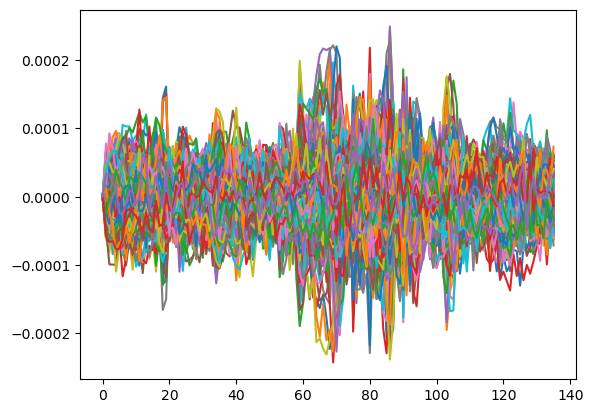

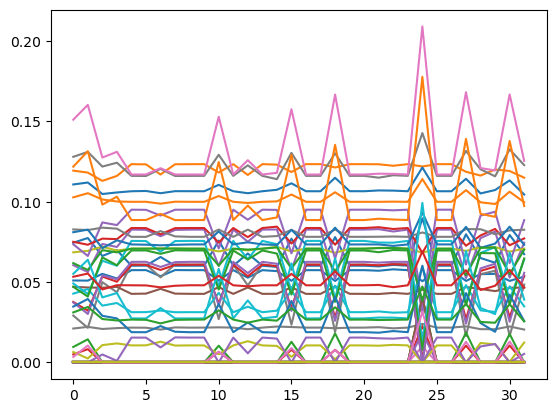

In [66]:
_,test_data = load_data("0522", '082906', '082914')
plt.plot(test_data)
plt.show()
test_data = np.expand_dims(test_data,axis = 0)
t=  torch.tensor(test_data)
plt.plot(mmodel(t).detach())
plt.show()

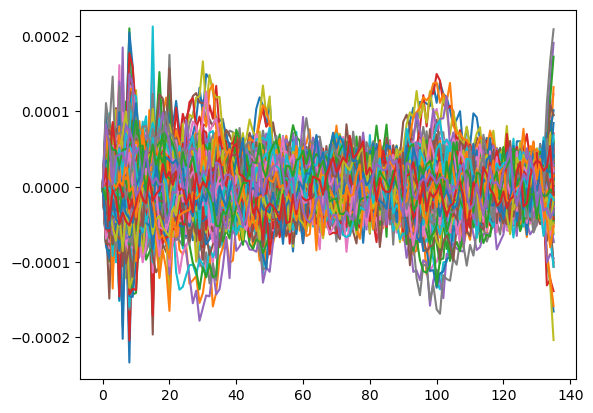

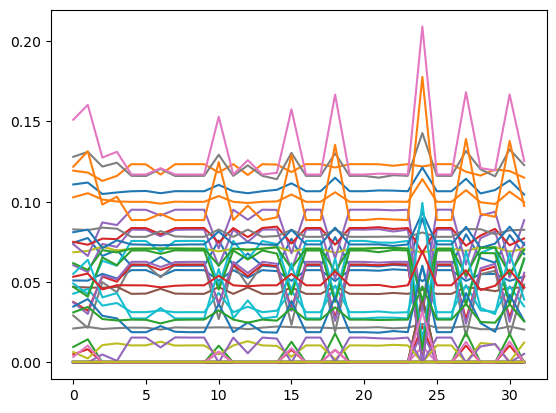

tensor([[[ True,  True,  True,  ...,  True,  True,  True],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])
tensor([[False, False,  True,  ..., False, False, False],
        [False, False,  True,  ..., False, False, False],
        [False, False,  True,  ..., False, False, False],
        ...,
        [False, False,  True,  ..., False, False, False],
        [False, False,  True,  ..., False, False, False],
        [False, False,  True,  ..., False, False, False]])


In [67]:
_,ltest_data = load_data("0522", '082914', '082922')
plt.plot(ltest_data)
plt.show()
ltest_data = np.expand_dims(ltest_data,axis = 0)
lt=  torch.tensor(ltest_data)
plt.plot(mmodel(lt).detach())
plt.show()
print(t == lt)
print(mmodel(lt) == mmodel(t))

In [69]:
class lbdset(Dataset):
    def __init__(self, file_path):
        self.file_path = sorted( glob.glob( os.path.join(file_path, '**', '*.npy'), recursive=True))
        self.file_path_list = sorted( [npy_path for npy_path in self.file_path if 'xx' in npy_path])
        self.transform = transforms.ToTensor()

    def __getitem__(self, index):
        file_name = self.file_path_list[index]
        data = np.load(file_name, allow_pickle=True)
        data = np.expand_dims(data,axis = 0)
        label = file_name[-5]
        return data, torch.tensor(int(label), dtype=torch.long)

    def __len__(self):
        return len(self.file_path_list)

In [70]:
labeledset = lbdset(current_path)
lbd_loader = DataLoader(labeledset, batch_size=32, shuffle=True)
print(len(lbd_loader))

2


In [61]:
# 학습
epochs = 5
a = []
p = []
r = []
f = []
msg = []

for epoch in range(epochs):
    model.train()
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    for inputs,label in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs,label)
        loss.backward()
        optimizer.step()

    # 검증
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    all_labels = []
    all_predicted = []
    
    with torch.no_grad():
        val_loader = DataLoader(tdset, batch_size=32, shuffle=True)
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_labels.extend(labels.cpu().numpy())
            all_predicted.extend(predicted.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    accuracy = correct / total
    
    accuracy = accuracy_score(all_labels, all_predicted)
    a.append(accuracy)
    precision = precision_score(all_labels, all_predicted, average='weighted')
    p.append(precision)
    recall = recall_score(all_labels, all_predicted, average='weighted')
    r.append(recall)
    f1 = f1_score(all_labels, all_predicted, average='weighted')
    f.append(f1)
    
    print(f'Accuracy: {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 = {f1:.4f}')
    msg.append(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}')
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}')

TypeError: object of type 'type' has no len()

In [36]:
print(a)
print(p)
print(r)
print(f)
print(msg)

[0.9937074611532041, 0.9937074611532041, 0.9937074611532041, 0.9937074611532041, 0.9937074611532041]
[0.9874545183515465, 0.9874545183515465, 0.9874545183515465, 0.9874545183515465, 0.9874545183515465]
[0.9937074611532041, 0.9937074611532041, 0.9937074611532041, 0.9937074611532041, 0.9937074611532041]
[0.9905711219843468, 0.9905711219843468, 0.9905711219843468, 0.9905711219843468, 0.9905711219843468]
['Epoch [1/5], Loss: 0.0160, Validation Loss: 0.0679, Accuracy: 0.9937', 'Epoch [2/5], Loss: 0.0412, Validation Loss: 0.0871, Accuracy: 0.9937', 'Epoch [3/5], Loss: 0.0206, Validation Loss: 0.0709, Accuracy: 0.9937', 'Epoch [4/5], Loss: 0.0028, Validation Loss: 0.0657, Accuracy: 0.9937', 'Epoch [5/5], Loss: 0.0017, Validation Loss: 0.0678, Accuracy: 0.9937']


In [39]:
######################

In [38]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(12)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(12)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(24)
        self.fc1 = nn.Linear(24*10*10, 10)

    def forward(self, input):
        output = F.relu(self.bn1(self.conv1(input)))      
        output = F.relu(self.bn2(self.conv2(output)))     
        output = self.pool(output)                        
        output = F.relu(self.bn4(self.conv4(output)))     
        output = F.relu(self.bn5(self.conv5(output)))     
        output = output.view(-1, 24*10*10)
        output = self.fc1(output)

        return output

# Instantiate a neural network model 
cnn = CNN()

In [41]:
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001, weight_decay=0.0001)

In [42]:
# Function to save the model
def saveModel():
    path = "./0522.pth" #date
    torch.save(cnn.state_dict(), path)

# Function to test the model with the test dataset and print the accuracy for the test images
def testAccuracy():
    
    cnn.eval()
    accuracy = 0.0
    total = 0.0
    
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = cnn(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.
def train(num_epochs):
    
    best_accuracy = 0.0

    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    cnn.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0

        for i, (images, labels) in enumerate(train_loader, 0):
            
            # get the inputs
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = cnn(images)
            # compute the loss based on model output and real labels
            loss = loss_fn(outputs, labels)
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            if i % 1000 == 999:    
                # print every 1000 (twice per epoch) 
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                # zero the loss
                running_loss = 0.0

        # Compute and print the average accuracy fo this epoch when tested over all 10000 test images
        accuracy = testAccuracy()
        print('For epoch', epoch+1,'the test accuracy over the whole test set is %d %%' % (accuracy))
        
        # we want to save the model if the accuracy is the best
        if accuracy > best_accuracy:
            saveModel()
            best_accuracy = accuracy

In [44]:
# Function to show the images
def imageshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Function to test the model with a batch of images and show the labels predictions
def testBatch():
    # get batch of images from the test DataLoader  
    images, labels = next(iter(test_loader))

    # show all images as one image grid
    imageshow(torchvision.utils.make_grid(images))
   
    # Show the real labels on the screen 
    print('Real labels: ', ' '.join('%5s' % classes[labels[j]] 
                               for j in range(batch_size)))
  
    # Let's see what if the model identifiers the  labels of those example
    outputs = cnn(images)
    
    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)
    
    # Let's show the predicted labels on the screen to compare with the real ones
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] 
                              for j in range(batch_size)))

In [ ]:
    # Let's build our model
    train(5)
    print('Finished Training')

    # Test which classes performed well
    testModelAccuracy()
    
    # Let's load the model we just created and test the accuracy per label
    cnn = Network()
    path = "myFirstModel.pth"
    model.load_state_dict(torch.load(path))

    # Test with batch of images
    testBatch()